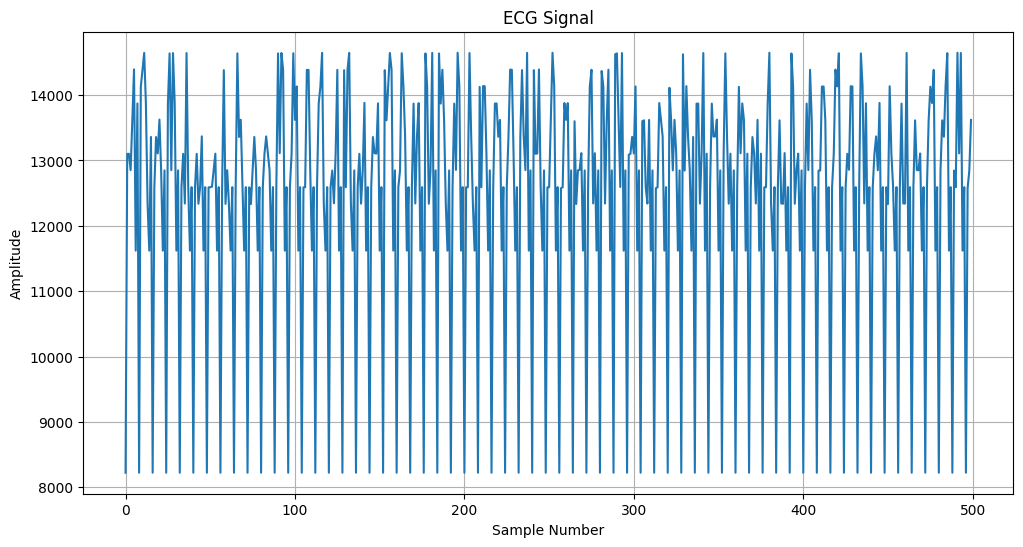

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_ecg_file.dat' with the actual file path.
file_path = '../Data/ECG1.dat   '
# Read the DAT file into a NumPy array.
try:
    ecg_data = np.fromfile(file_path, dtype=np.int16)  # Adjust dtype if needed.
except FileNotFoundError:
    print(f"File '{file_path}' not found.")
    exit()

# Plot the ECG signal.
plt.figure(figsize=(12, 6))
plt.plot(ecg_data[:500])
plt.title('ECG Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


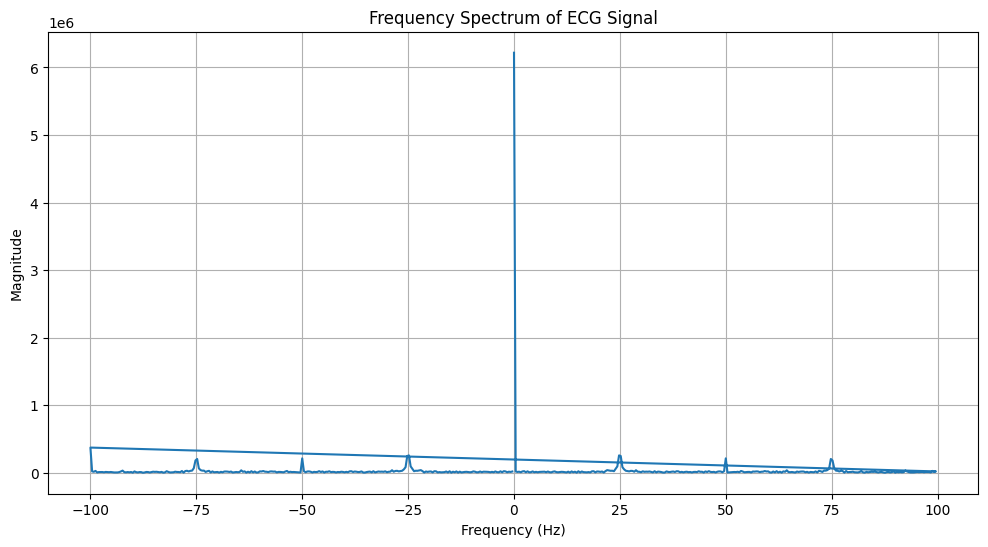

In [14]:
# plot frequency domain representation of the signal

# Compute the Fast Fourier Transform (FFT).
fft = np.fft.fft(ecg_data[:500])
# Compute the frequency values.
fft_freq = np.abs(fft)
# Generate the frequency range.
freqs = np.fft.fftfreq(len(fft_freq) , d=(1/200))
# Plot the frequency spectrum.
plt.figure(figsize=(12, 6))
plt.plot(freqs, fft_freq)
plt.title('Frequency Spectrum of ECG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
# Define FIR low pass filter.
def fir_low_pass_filter(data, cutoff, fs, order):
    # Calculate Nyquist frequency.
    nyq = fs / 2
    # Calculate FIR coefficients.
    b = signal.firwin(order, cutoff / nyq)
    # Apply filter to data.
    return signal.lfilter(b, 1, data)


In [ ]:

filtered_ecg = fir_low_pass_filter(ecg_data, 99, 200, 100)

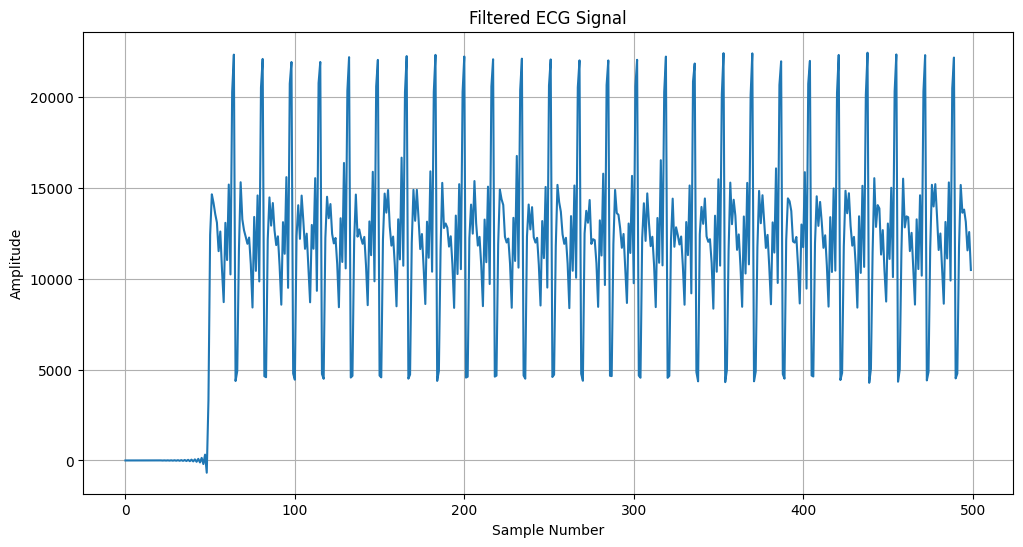

In [ ]:
#plot the filtered signal
plt.figure(figsize=(12, 6))
plt.plot(filtered_ecg[:500])
plt.title('Filtered ECG Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.grid(True)

File 'your_ecg_file.dat' not found.


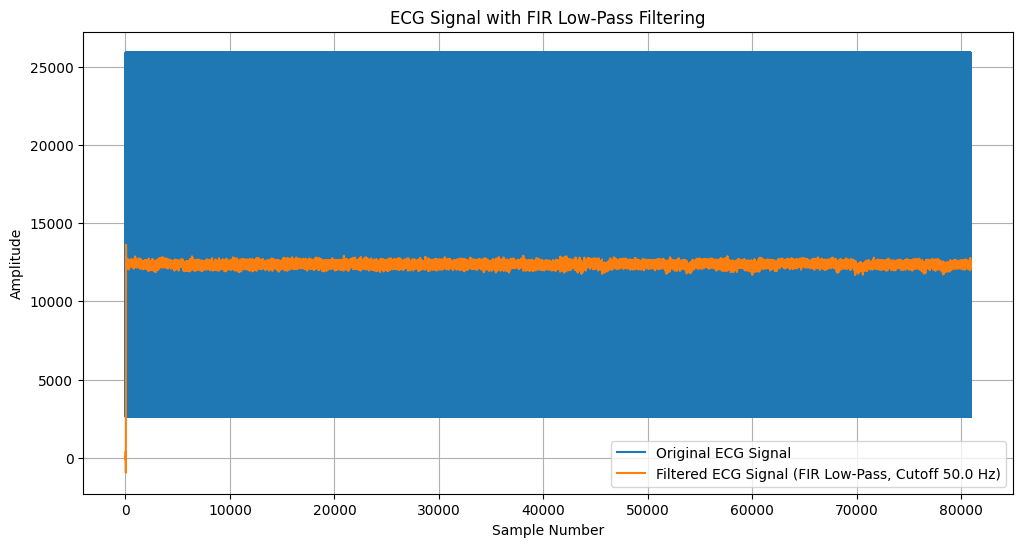

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import lfilter

# Replace 'your_ecg_file.dat' with the actual file path.
file_path = 'your_ecg_file.dat'

# Read the DAT file into a NumPy array (adjust dtype if needed).
try:
    ecg_data = np.fromfile(file_path, dtype=np.int16)
except FileNotFoundError:
    print(f"File '{file_path}' not found.")
    exit()

# Define the sampling frequency (adjust as needed).
fs = 1000.0  # Sampling frequency in Hz.

# Define the cutoff frequency for the low-pass filter (adjust as needed).
cutoff_freq = 50.0  # Cutoff frequency in Hz.

# Calculate the filter order (adjust as needed).
nyquist_freq = 0.5 * fs
filter_order = 101  # Adjust the filter order (odd number) for the desired filter characteristics.

# Design a low-pass FIR filter using a Hamming window.
# You can use other windows like 'hann', 'blackman', etc., depending on your requirements.
filter_coeffs = np.sinc(2 * cutoff_freq / fs * (np.arange(filter_order) - (filter_order - 1) / 2))
filter_window = np.hamming(filter_order)  # Adjust the window type if needed.
filter_coeffs = filter_coeffs * filter_window
filter_coeffs = filter_coeffs / np.sum(filter_coeffs)  # Normalize the filter coefficients.

# Apply the FIR filter to the ECG signal using lfilter.
ecg_filtered = lfilter(filter_coeffs, 1.0, ecg_data)

# Plot the original and filtered ECG signals for comparison.
plt.figure(figsize=(12, 6))
plt.plot(ecg_data, label='Original ECG Signal')
plt.plot(ecg_filtered, label=f'Filtered ECG Signal (FIR Low-Pass, Cutoff {cutoff_freq} Hz)')
plt.title('ECG Signal with FIR Low-Pass Filtering')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
